# Агрегантные функции

На протяжении всего модуля мы будем работать с таблицей sql.pokemon, содержащей данные о покемонах и их характеристиках из классических видеоигр.

Давайте познакомимся с нашими покемонами и данными о них!

Присмотримся к содержимому таблицы sql.pokemon: в ней хранится информация о покемонах.

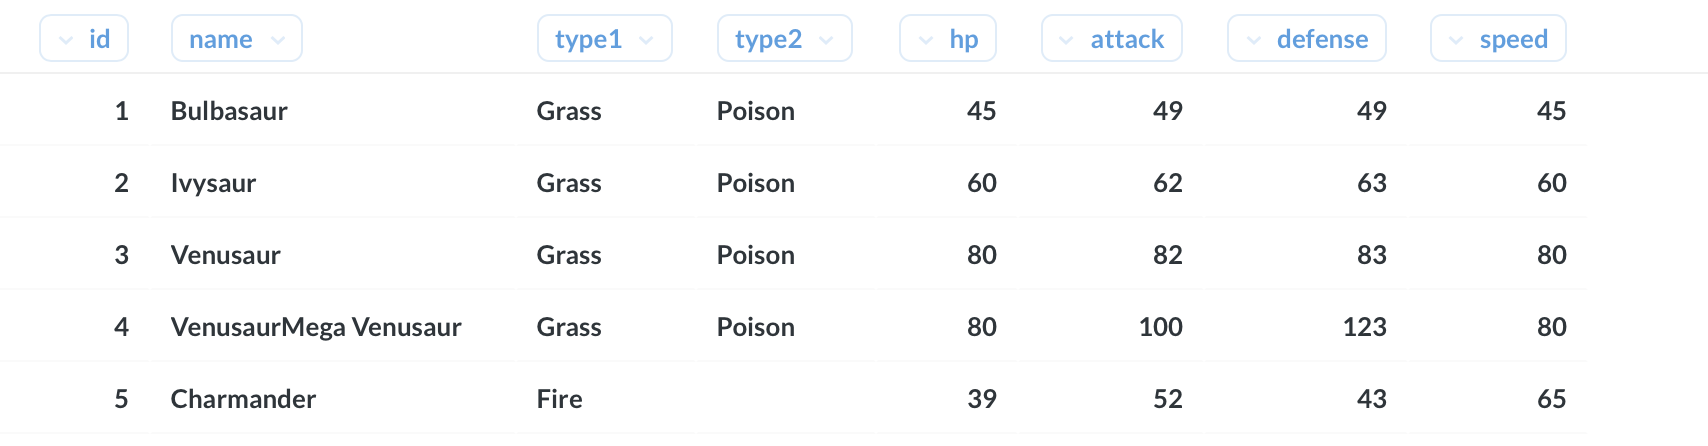

Примечание. На этом скриншоте представлен лишь фрагмент таблицы: в действительности она значительно больше и содержит почти 800 строк.

---

### Убираем повторяющиеся значения

Примечание. Как и в предыдущем модуле, вы можете посмотреть подробный разбор структуры предлагаемых запросов в блоке Детализация.

Для начала получим все основные типы покемонов.

Запрос\
SELECT\
    type1\
FROM sql.pokemon

Детализация\
SELECT /*выбор*/\
    type1 /*столбец type1*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/



Видно, что типы повторяются, потому что в результате запроса вы получаете все строки, которые подходят под заданные условия.

Чтобы получить уникальные значения из столбца, воспользуемся ключевым словом DISTINCT.

Запрос\
SELECT DISTINCT\
    type1\
FROM sql.pokemon

Детализация\
SELECT DISTINCT /*выбрать уникальные значения*/\
    type1 /*столбец type1*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/



Мы можем применять DISTINCT и для нескольких столбцов.

Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

Запрос\
SELECT DISTINCT\
    type1,\
    type2\
FROM sql.pokemon

Детализация\
SELECT DISTINCT /*выбрать уникальные значения*/\
    type1, /*столбец type1*/\
    type2 /*столбец type2*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/

На скриншоте ниже представлен фрагмент вывода по нашему запросу.


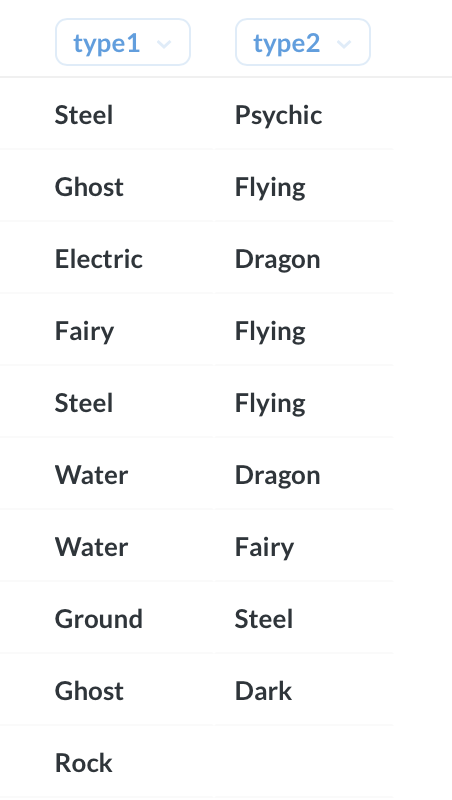

Обратите внимание! DISTINCT пишется только один раз, в начале списка получаемых столбцов.

---

### Агрегатные функции

✍ Кроме простых математических операций, которые мы использовали в предыдущем модуле, СУБД позволяет проводить статистические вычисления для нескольких строк.


Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию COUNT.

SELECT\
    COUNT(*)\
FROM sql.pokemon

COUNT считает строки, а звёздочка (*) в аргументе функции означает, что считаются все строки, которые возвращает запрос.

Если в аргументе функции указать название столбца, функция обработает только строки с непустым значением.

Внутри функции COUNT мы можем также применять DISTINCT, чтобы вычислить количество уникальных значений.


Запрос\
SELECT\
    COUNT(DISTINCT type1)\
FROM sql.pokemon

Детализаци
SELECT /*выбор*/\
    COUNT(DISTINCT type1) /*функция подсчёта строк; уникальные значения столбца type1*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/

### Основные агрегатные функции

Назовём основные агрегатные функции, с которыми нам предстоит работать:

* COUNT — вычисляет число непустых строк;
* SUM — вычисляет сумму;
* AVG — вычисляет среднее;
* MAX — вычисляет максимум;
* MIN — вычисляет минимум.

Разумеется, вы можете использовать в запросе фильтрацию строк с помощью WHERE, чтобы получить агрегированное значение только для отдельных строк.

Кроме того, мы можем применять несколько агрегатных функций в одном запросе.

Запрос\
SELECT\
    COUNT(*) AS "всего травяных покемонов",\
    COUNT(type2) AS "покемонов с дополнительным типом",\
    AVG(attack) AS "средняя атака",\
    AVG(defense) AS "средняя защита"\
FROM sql.pokemon\
WHERE type1 = 'Grass'


Детализация\
SELECT /*выбор*/\
    COUNT(*) AS "всего травяных покемонов", /*подсчёт всех строк; назначить алиас "всего травяных покемонов"*/\
    COUNT(type2) AS "покемонов с дополнительным типом", /*подсчёт непустых строк в столбце type2; назначить алиас "покемонов с дополнительным типом"*/\
    AVG(attack) AS "средняя атака", /*среднее значение столбца attack; назначить алиас "средняя атака"*/\
    AVG(defense) AS "средняя защита" /*среднее значение столбца defense; назначить алиас "средняя защита"*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/\
WHERE type1 = 'Grass'/*при условии, что значение столбца type1 содержит grass*/


В результате получим следующий вывод:

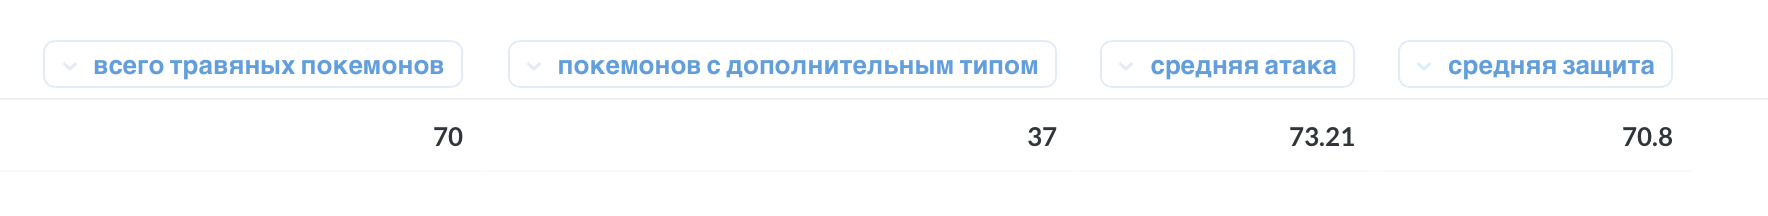

---

### Группировка

✍ Как мы помним, агрегатные функции вычисляют какой-то параметр для набора строк.

Прежде мы применяли агрегатные функции для всего вывода, а сейчас используем для различных групп строк. Поможет нам в этом ключевое слово GROUP BY.

GROUP BY используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

Выведем число покемонов каждого типа.

Запрос\
SELECT\
    type1 AS pokemon_type,\
    COUNT(*) AS pokemon_count\
FROM sql.pokemon\
GROUP BY type1\
ORDER BY type1

Детализация\
SELECT /*выбор*/\
    type1 AS pokemon_type, /*столбец type1; присвоить алиас pokemon_type*/\
    COUNT(*) AS pokemon_count /*подсчёт всех строк; присвоить алиас pokemon_count*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/\
GROUP BY type1 /*группировка по столбцу type1*/\
ORDER BY type1 /*сортировка по столбцу type1*/

Мы получили такой результат:

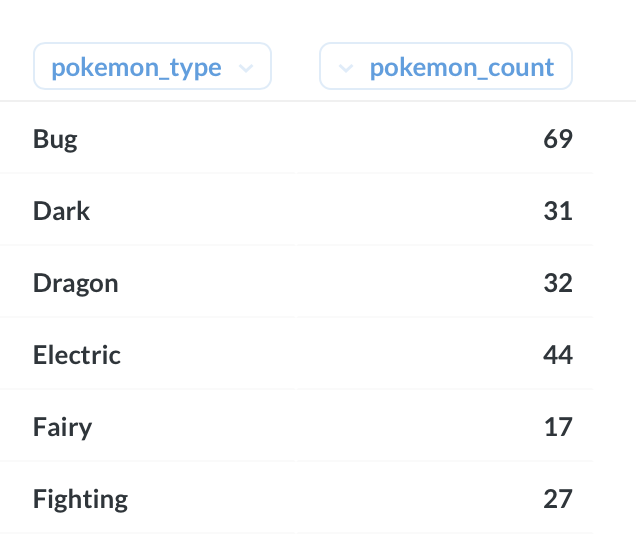

Вывод, конечно же, можно сортировать по столбцу с агрегированием.


Представим ТОП существующих типов покемонов.

Запрос\
SELECT\
    type1 AS pokemon_type,\
    COUNT(*) AS pokemon_count\
FROM sql.pokemon\
GROUP BY pokemon_type\
ORDER BY COUNT(*) DESC

Детализация\
SELECT /*выбор*/\
    type1 AS pokemon_type, /*столбец type1; присвоить алиас pokemon_type*/\
    COUNT(*) AS pokemon_count /*подсчёт всех строк; присвоить алиас pokemon_count*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/\
GROUP BY pokemon_type /*группировка по столбцу pokemon_type*/\
ORDER BY COUNT(*) DESC /*сортировка в порядке убывания*/

Обратите внимание! Мы использовали в группировке не название столбца, а его алиас.

Мы можем осуществлять группировку по нескольким столбцам.

Попробуйте в Metabase!

Запрос\
SELECT\
    type1 AS primary_type,\
    type2 AS additional_type,\
    COUNT(*) AS pokemon_count\
FROM sql.pokemon\
GROUP BY 1, 2\
ORDER BY 1, 2 NULLS FIRST

Детализация\
SELECT /*выбор*/\
    type1 AS primary_type, /*столбец type1; присвоить алиас primary_type*/\
    type2 AS additional_type, /*столбец type2; присвоить алиас additional_type*/\
    COUNT(*) AS pokemon_count /*подсчёт всех строк присвоить алиас pokemon_count*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/\
GROUP BY 1, 2 /*группировка по столбцам 1 и 2*/\
ORDER BY 1, 2 NULLS FIRST /*сортировка по столбцам 1 и 2; сначала нули*/

Обратите внимание! В группировке можно указывать порядковый номер столбца так же, как мы делали это в прошлом модуле для сортировки.

GROUP BY можно использовать и без агрегатных функций. Тогда его действие будет равносильно действию DISTINCT.

Сравните выводы двух запросов:

SELECT DISTINCT\ 
    type1\
FROM sql.pokemon

SELECT\
    type1\
FROM sql.pokemon\
GROUP BY type1

---

### Фильтрация агрегированных строк

✍ Если ключевое слово WHERE определяет фильтрацию строк до агрегирования, то для фильтрации уже агрегированных данных применяется ключевое слово HAVING.

Важно! HAVING обязательно пишется после GROUP BY.

Выведем типы покемонов и их средний показатель атаки, при этом оставим только тех, у кого средняя атака больше 90.

Запрос\
SELECT\
    type1 AS primary_type,\
    AVG(attack) AS avg_attack\
FROM sql.pokemon\
GROUP BY primary_type \
HAVING AVG(attack) > 90

Детализация\
SELECT /*выбор*/\
    type1 AS primary_type, /*таблица type1; присвоить алиас primary_type*/\
    AVG(attack) AS avg_attack /*расчёт среднего по столбцу attack; присвоить алиас avg_attack*/\
FROM sql.pokemon /*из таблицы sql.pokemon*/\
GROUP BY primary_type /*группировать по столбцу primary_type*/\
HAVING AVG(attack) > 90 /*фильтровать по среднему значению attack, превышающему 90*/

Попробуйте удалить из запроса вывод второго столбца (со средним показателем атаки).

Что получилось?

Запрос работает и выводит только названия типов, у которых средний показатель атаки выше 90.

В HAVING вы можете использовать все те же условия, что и в WHERE.

Вместо резюме
В общем виде синтаксис оператора SELECT, с учётом имеющихся на данный момент знаний, представляем следующим образом:

SELECT [ALL | DISTINCT] список_столбцов|*\
FROM список_имён_таблиц\
[WHERE условие_поиска]\
[GROUP BY список_имён_столбцов]\
[HAVING условие_поиска]\
[ORDER BY имя_столбца [ASC | DESC],…]

Обратите внимание! В квадратных скобках указаны необязательные предложения: они могут отсутствовать в операторе SELECT.

И в довершение итогов напомним структуру запроса, который мы можем составить с учётом новых знаний:

SELECT\
    столбец1 AS новое_название,\
    столбец2,\
    АГРЕГАТ(столбец3)\
FROM таблица\
WHERE (условие1 OR условие2)\
    AND условие3\
GROUP BY столбец1, столбец2\
HAVING АГРЕГАТ(столбец3) > 5\
ORDER BY сортировка1, сортировка2\
OFFSET 1 LIMIT 2